# Loan Application Status Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

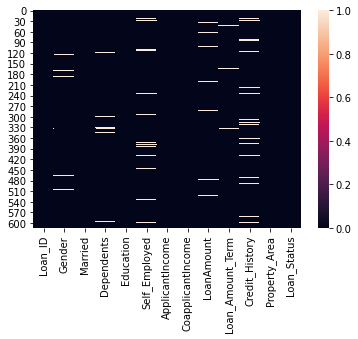

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.drop('Loan_ID',axis=1, inplace=True)

In [7]:
#filling the Missing value with mean for continous data
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

#filling the missing value with mode for catagorical data
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [8]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

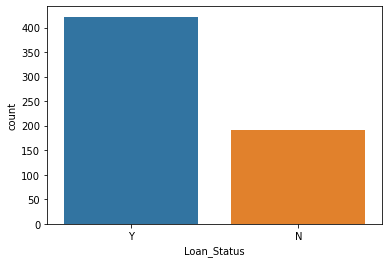

In [9]:
sns.countplot(df["Loan_Status"])

<AxesSubplot:xlabel='Married', ylabel='count'>

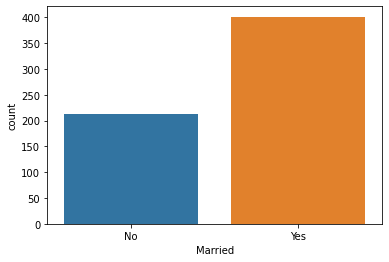

In [10]:
sns.countplot(df["Married"])

<AxesSubplot:xlabel='Education', ylabel='count'>

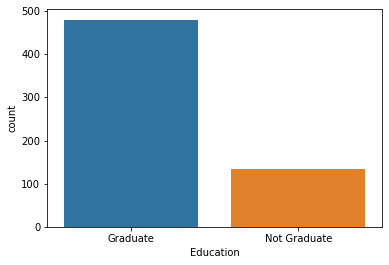

In [11]:
sns.countplot(df["Education"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

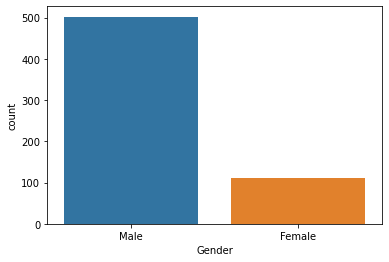

In [12]:
sns.countplot(df["Gender"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

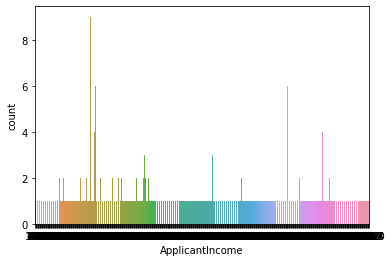

In [13]:
sns.countplot(df["ApplicantIncome"])

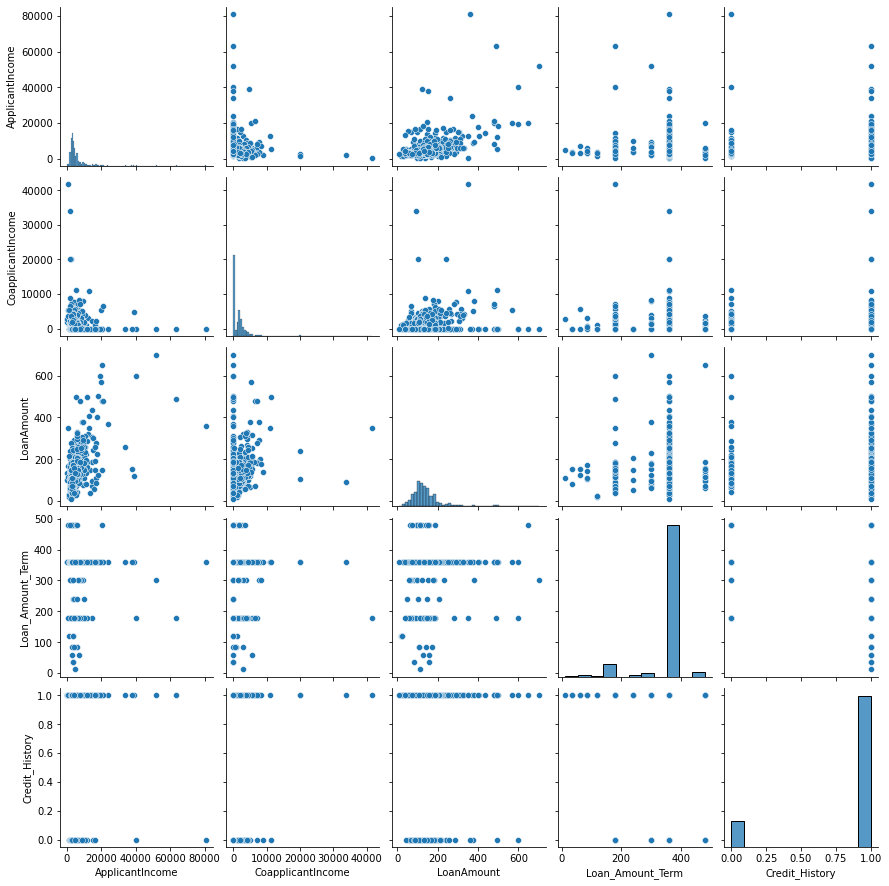

In [14]:
sns.pairplot(df)

# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [16]:
#labelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df["Loan_Status"])


#ordinal Endocer
oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


Gender                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Married              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Dependents           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Education            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Self_Employed        AxesSubplot(0.656429,0.536818;0.110714x0.343182)
ApplicantIncome      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.110714x0.343182)
LoanAmount              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Loan_Amount_Term        AxesSubplot(0.390714,0.125;0.110714x0.343182)
Credit_History          AxesSubplot(0.523571,0.125;0.110714x0.343182)
Property_Area           AxesSubplot(0.656429,0.125;0.110714x0.343182)
Loan_Status             AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

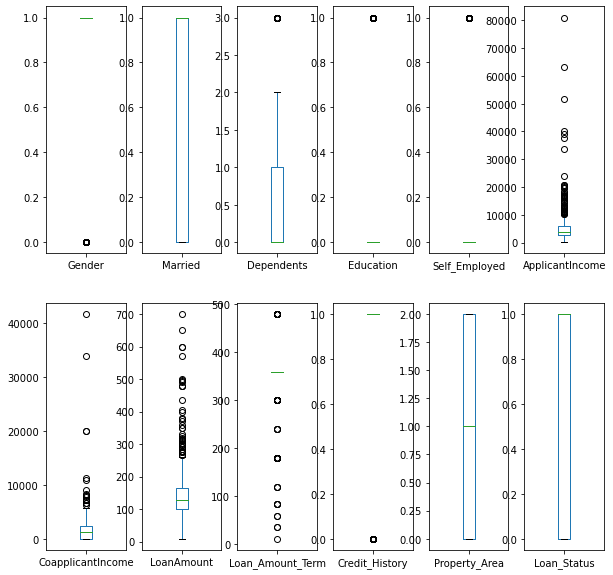

In [52]:
df.plot(kind='box', subplots=True,layout=(2,6) ,figsize=(10,10))

# Checking correlation

In [18]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

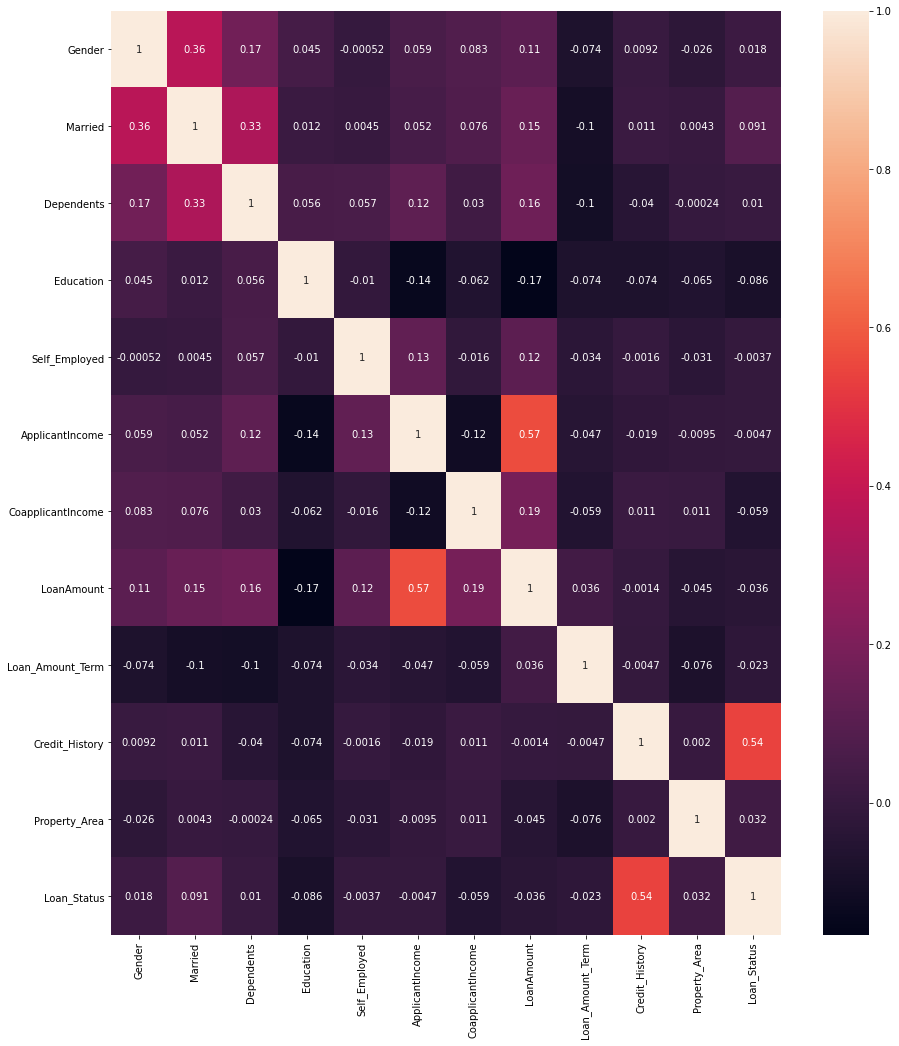

In [19]:
plt.figure(figsize=(15,17))
sns.heatmap(df.corr(), annot=True)

# Removing outliers

In [20]:
#removing outliers
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [21]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [22]:
df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1


In [23]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [24]:
x=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

In [25]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x.y= sm.fit_resample(x,y)

In [27]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.273231,0.411733,1.223298


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [30]:
max_accuracy=0
max_randomstate=0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train, y_train)
    predrf= lr.predict(x_test)
    acc= accuracy_score(y_test, predrf)
    if acc>max_accuracy:
        max_accuracy=acc
        max_randomstate=i
print('Best accuracy is', max_accuracy,'on random_state', max_randomstate)

Best accuracy is 0.9024390243902439 on random_state 368


In [31]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.20, random_state=368)

# Logistic Regression

In [32]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.9024390243902439
[[21 11]
 [ 1 90]]
              precision    recall  f1-score   support

           0       0.95      0.66      0.78        32
           1       0.89      0.99      0.94        91

    accuracy                           0.90       123
   macro avg       0.92      0.82      0.86       123
weighted avg       0.91      0.90      0.90       123



# Support Vector Classifier

In [33]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.9105691056910569
[[21 11]
 [ 0 91]]
              precision    recall  f1-score   support

           0       1.00      0.66      0.79        32
           1       0.89      1.00      0.94        91

    accuracy                           0.91       123
   macro avg       0.95      0.83      0.87       123
weighted avg       0.92      0.91      0.90       123



#  KNeighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc= knc.predict(x_test)
print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test, predknc))

0.8943089430894309
[[21 11]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.76        32
           1       0.89      0.98      0.93        91

    accuracy                           0.89       123
   macro avg       0.90      0.82      0.85       123
weighted avg       0.90      0.89      0.89       123



# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc= rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.8699186991869918
[[22 10]
 [ 6 85]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.89      0.93      0.91        91

    accuracy                           0.87       123
   macro avg       0.84      0.81      0.82       123
weighted avg       0.87      0.87      0.87       123



# Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
preddtc= dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.7154471544715447
[[21 11]
 [24 67]]
              precision    recall  f1-score   support

           0       0.47      0.66      0.55        32
           1       0.86      0.74      0.79        91

    accuracy                           0.72       123
   macro avg       0.66      0.70      0.67       123
weighted avg       0.76      0.72      0.73       123



# Hyper Parameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

In [38]:
gsv= GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gsv.fit(x_train, y_train)  #fitting the data in model
gsv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth' :7, 'max_features': 'sqrt'}

gsv_pred=gsv.best_estimator_.predict(x_test)   #predicting with best parameters
accuracy_score(y_test, gsv_pred)   #checking final accuracy

0.8943089430894309

# AUC ROC Curve

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [39]:
y=rfc.predict_proba(x_test)[:,1]
y

array([0.24, 0.96, 0.57, 0.63, 0.84, 0.9 , 0.69, 0.78, 0.45, 0.07, 0.6 ,
       0.79, 0.13, 0.49, 0.82, 0.77, 0.81, 0.65, 0.88, 0.48, 0.95, 0.68,
       0.53, 0.81, 0.27, 0.91, 0.51, 0.55, 0.3 , 0.9 , 0.18, 0.9 , 0.88,
       0.56, 0.86, 0.71, 0.89, 0.68, 0.83, 0.66, 0.72, 0.69, 0.24, 0.88,
       0.07, 0.7 , 0.76, 0.59, 0.88, 0.57, 0.26, 0.95, 0.41, 0.91, 0.91,
       0.29, 0.94, 0.85, 0.81, 0.76, 0.8 , 0.15, 0.72, 0.71, 0.76, 0.92,
       0.83, 0.28, 0.94, 0.03, 0.87, 0.94, 0.11, 0.18, 0.84, 0.78, 0.81,
       0.13, 0.82, 0.72, 0.76, 0.15, 0.81, 0.96, 0.68, 0.88, 0.75, 0.68,
       0.21, 0.56, 0.74, 0.88, 0.85, 0.89, 0.98, 0.9 , 0.47, 0.08, 0.94,
       0.4 , 0.86, 0.09, 0.85, 0.98, 0.8 , 0.92, 0.48, 0.9 , 0.95, 0.88,
       0.96, 0.85, 0.77, 0.77, 0.71, 0.71, 0.8 , 0.1 , 0.75, 0.68, 0.67,
       0.67, 0.58])

In [42]:
fpr,tpr,thresholds=roc_curve(y_test,y)

In [43]:
fpr

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.03125, 0.03125, 0.0625 , 0.0625 ,
       0.09375, 0.09375, 0.09375, 0.09375, 0.09375, 0.125  , 0.1875 ,
       0.1875 , 0.21875, 0.25   , 0.25   , 0.25   , 0.25   , 0.25   ,
       0.25   , 0.28125, 0.28125, 0.28125, 0.3125 , 0.3125 , 0.34375,
       0.375  , 0.375  , 0.5    , 0.5625 , 0.59375, 0.78125, 0.90625,
       0.96875, 1.     ])

In [44]:
tpr

array([0.        , 0.02197802, 0.08791209, 0.13186813, 0.15384615,
       0.18681319, 0.24175824, 0.26373626, 0.34065934, 0.35164835,
       0.36263736, 0.40659341, 0.41758242, 0.46153846, 0.50549451,
       0.53846154, 0.54945055, 0.57142857, 0.6043956 , 0.63736264,
       0.63736264, 0.64835165, 0.67032967, 0.7032967 , 0.71428571,
       0.73626374, 0.79120879, 0.81318681, 0.83516484, 0.83516484,
       0.86813187, 0.89010989, 0.9010989 , 0.93406593, 0.93406593,
       0.94505495, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [45]:
thresholds

array([1.98, 0.98, 0.95, 0.94, 0.92, 0.91, 0.9 , 0.89, 0.88, 0.87, 0.86,
       0.85, 0.84, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.77, 0.76, 0.75, 0.74,
       0.72, 0.71, 0.7 , 0.69, 0.68, 0.67, 0.65, 0.63, 0.58, 0.57, 0.56,
       0.51, 0.49, 0.48, 0.3 , 0.26, 0.24, 0.21, 0.13, 0.08, 0.07, 0.03])

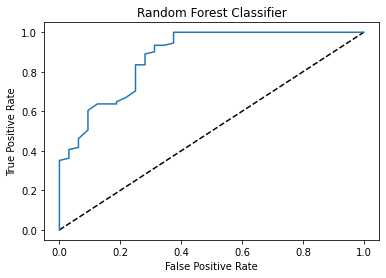

In [46]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [47]:
score= roc_auc_score(y_test, rfc.predict(x_test))
print(score)

0.810782967032967


# Saving the model in pickle format

In [48]:
import pickle
filename='Loan Application Status .pkl'
pickle.dump(rfc,open(filename,"wb"))

# Conclusion

In [49]:
model=pickle.load(open('Loan Application Status .pkl',"rb"))
result=model.score(x_test,y_test)
print(result)

0.8699186991869918


In [50]:
conclusion=pd.DataFrame([model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
Predicted,0,1,1,1,1,1,1,1,0,0,...,1,1,1,1,0,1,1,1,1,1
Original,0,1,1,1,1,1,1,1,0,0,...,1,1,1,1,0,1,1,1,1,1
